In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, ExpSineSquared, RBF, RationalQuadratic
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#temp_data = np.array([random.randint(9, 115) for each in range(100)])

In [3]:
def vector_temp1(num=None, vect_len=None):
    tens, ones = divmod(np.abs(num), 10)
    if num < 0:
        return [1] + [ones] + [10 for each in range(tens)] + [0 for each in range(vect_len-tens)]
    else:
        return [0] + [ones] + [10 for each in range(tens)] + [0 for each in range(vect_len-tens)]
    
#https://www.recurve.com/how-it-works/caltrack-hourly-methods
def vector_temp2(num=None, vect_len=7):
    
    if num < 30:
        return [num] + [0 for each in range(vect_len-1)]
    
    elif (num < 45) & (num >= 30):
        vect_start = [30]
        a, b = divmod(num-np.sum(vect_start), 15)
        return  vect_start + [b] + [0 for each in range(vect_len-2)]
    
    elif (num < 55) & (num >= 45):
        vect_start = [30, 15]
        a, b = divmod(num-np.sum(vect_start), 10)
        return vect_start + [b] + [0 for each in range(vect_len-3)]
    
    elif (num < 65) & (num >= 55):
        vect_start = [30, 15, 10]
        a, b = divmod(num-np.sum(vect_start), 10)
        return vect_start + [b] + [0 for each in range(vect_len-4)]
    
    elif (num < 75) & (num >= 65):
        vect_start = [30, 15, 10, 10]
        a, b = divmod(num-np.sum(vect_start), 10)
        return  vect_start + [b] + [0 for each in range(vect_len-5)]   
    
    elif (num < 90) & (num >= 75):
        vect_start = [30, 15, 10, 10, 10]
        a, b = divmod(num-np.sum(vect_start), 15)
        return vect_start + [b] + [0 for each in range(vect_len-6)]
    
    elif (num >= 90):
        vect_start = [30, 15, 10, 10, 10, 15]
        a, b = divmod(num-np.sum(vect_start), 10)
        return  vect_start + [num-np.sum(vect_start)] 

def disaggregated_func(vect_len=None, temp_data=None):
    results = []
    for each in temp_data:
        results_dict = dict()
        results_dict['temp'] = each
        results_dict['disaggregated'] = vector_temp(num=each, vect_len=vect_len)
        results.append(results_dict)
    return results

def vector_day(week_num=None):
    if week_num == 1:
        return [0 for each in range(0)] + [1] + [0 for each in range(7-week_num)]
    elif week_num == 2:
        return [0 for each in range(1)] + [1] + [0 for each in range(7-week_num)]
    elif week_num == 3:
        return [0 for each in range(2)] + [1] + [0 for each in range(7-week_num)]
    elif week_num == 4:
        return [0 for each in range(3)] + [1] + [0 for each in range(7-week_num)]
    elif week_num == 5:
        return [0 for each in range(4)] + [1] + [0 for each in range(7-week_num)]
    elif week_num == 6:
        return [0 for each in range(5)] + [1] + [0 for each in range(7-week_num)]
    elif week_num == 7:
        return [0 for each in range(6)] + [1] + [0 for each in range(7-week_num)]
    
def vector_hour(hour_num=None):
    if hour_num == 1:
        return [0 for each in range(24-24)] + [1] + [0 for each in range(24-1)]
    
    elif hour_num == 2:
        return [0 for each in range(24-23)] + [1] + [0 for each in range(24-2)]
    
    elif hour_num == 3:
        return [0 for each in range(24-22)] + [1] + [0 for each in range(24-3)]
    
    elif hour_num == 4:
        return [0 for each in range(24-21)] + [1] + [0 for each in range(24-4)]
    
    elif hour_num == 5:
        return [0 for each in range(24-20)] + [1] + [0 for each in range(24-5)]
    
    elif hour_num == 6:
        return [0 for each in range(24-19)] + [1] + [0 for each in range(24-6)]
    
    elif hour_num == 7:
        return [0 for each in range(24-18)] + [1] + [0 for each in range(24-7)]
    
    elif hour_num == 8:
        return [0 for each in range(24-17)] + [1] + [0 for each in range(24-8)]
    
    elif hour_num == 9:
        return [0 for each in range(24-16)] + [1] + [0 for each in range(24-9)]
    
    elif hour_num == 10:
        return [0 for each in range(24-15)] + [1] + [0 for each in range(24-10)]
    
    elif hour_num == 11:
        return [0 for each in range(24-14)] + [1] + [0 for each in range(24-11)]
    
    elif hour_num == 12:
        return [0 for each in range(24-13)] + [1] + [0 for each in range(24-12)]
    
    elif hour_num == 13:
        return [0 for each in range(24-12)] + [1] + [0 for each in range(24-13)]
    
    elif hour_num == 14:
        return [0 for each in range(24-11)] + [1] + [0 for each in range(24-14)]
    
    elif hour_num == 15:
        return [0 for each in range(24-10)] + [1] + [0 for each in range(24-15)]
    
    elif hour_num == 16:
        return [0 for each in range(24-9)] + [1] + [0 for each in range(24-16)]
    
    elif hour_num == 17:
        return [0 for each in range(24-8)] + [1] + [0 for each in range(24-17)]
    
    elif hour_num == 18:
        return [0 for each in range(24-7)] + [1] + [0 for each in range(24-18)]
    
    elif hour_num == 19:
        return [0 for each in range(24-6)] + [1] + [0 for each in range(24-19)]
    
    elif hour_num == 20:
        return [0 for each in range(24-5)] + [1] + [0 for each in range(24-20)]
    
    elif hour_num == 21:
        return [0 for each in range(24-4)] + [1] + [0 for each in range(24-21)]
    
    elif hour_num == 22:
        return [0 for each in range(24-3)] + [1] + [0 for each in range(24-22)]
    
    elif hour_num == 23:
        return [0 for each in range(24-2)] + [1] + [0 for each in range(24-23)]
    
    elif hour_num == 24:
        return [0 for each in range(24-1)] + [1] + [0 for each in range(24-24)]
    
def create_feature_vector(hour_i=None, week_i=None, temp_i=None):
    day = vector_day(week_num=week_i)
    hour = vector_hour(hour_num=hour_i)
    temp = vector_temp2(num=temp_i, vect_len=7)
    return day + hour + temp

In [4]:
#create_feature_vector(hour_i=12, week_i=6, temp_i=94)

In [5]:
#disaggregated_temp_data = disaggregated_func(vect_len=12, temp_data=temp_data)

In [6]:
feature_vector = []
idx = 0
for each_week in range(1, 52+1):
    for each_day in range(1, 7+1):
        for each_hour in range(1, 24+1):
            idx += 1
            num = random.randint(9, 115)
            feature_vector_i = create_feature_vector(hour_i=each_hour, week_i=each_day, temp_i=num)
            feature_vector.append(feature_vector_i)

In [7]:
len(feature_vector)
#regress feature vector with energy usage.

8736

In [8]:
file = '/Users/gta/Desktop/archive-002/ee-project/ashrae-energy-prediction/train.csv'
file2 = '/Users/gta/Desktop/archive-002/ee-project/ashrae-energy-prediction/weather_train.csv'
file3 = '/Users/gta/Desktop/archive-002/ee-project/ashrae-energy-prediction/building_metadata.csv'
df = pd.read_csv(file)
df_weather = pd.read_csv(file2)
df3 = pd.read_csv(file3)

In [9]:
df_weather[df_weather['air_temperature'] == 47.2]

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
21649,2,2016-06-19 22:00:00,47.2,2.0,-0.6,0.0,1004.9,NaN,2.6
21650,2,2016-06-19 23:00:00,47.2,2.0,-2.2,0.0,1004.0,NaN,2.6
21651,2,2016-06-20 00:00:00,47.2,2.0,-1.1,0.0,1003.3,NaN,2.1
21652,2,2016-06-20 01:00:00,47.2,2.0,-1.1,0.0,1002.8,300.0,5.7


In [10]:
df3[df3['building_id'] == 156]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
156,2,156,Public services,43681,2007.0,NaN


In [11]:
len(set(df3['building_id'].tolist()))

1449

In [12]:
df3[df3['site_id'] == 2]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
156,2,156,Public services,43681,2007.0,NaN
157,2,157,Office,5258,NaN,NaN
158,2,158,Office,10135,NaN,NaN
159,2,159,Education,9788,NaN,NaN
160,2,160,Entertainment/public assembly,15786,NaN,NaN
...,...,...,...,...,...,...
286,2,286,Lodging/residential,32841,1935.0,NaN
287,2,287,Office,33713,1956.0,NaN
288,2,288,Entertainment/public assembly,10733,2005.0,NaN
289,2,289,Entertainment/public assembly,9666,2005.0,NaN


In [13]:
df3[df3['building_id'] == 156]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
156,2,156,Public services,43681,2007.0,NaN


In [14]:
df3[df3['building_id'] == 156]

,site_id,building_id,primary_use,square_feet,year_built,floor_count
156,2,156,Public services,43681,2007.0,NaN


In [15]:
df[df['building_id'] == 156]

,building_id,meter,timestamp,meter_reading
166,156,0,2016-01-01 00:00:00,114.71
2467,156,0,2016-01-01 01:00:00,117.87
4760,156,0,2016-01-01 02:00:00,122.70
7059,156,0,2016-01-01 03:00:00,118.42
9355,156,0,2016-01-01 04:00:00,130.34
...,...,...,...,...
20204465,156,0,2016-12-31 19:00:00,107.91
20206828,156,0,2016-12-31 20:00:00,107.83
20209194,156,0,2016-12-31 21:00:00,105.51
20211559,156,0,2016-12-31 22:00:00,105.51


In [16]:
df_building_1387_energy = df[(df['building_id'] == 156) & (df['meter'] == 0)].reset_index(drop=True)
df_building_1387_energy.head()

,building_id,meter,timestamp,meter_reading
0,156,0,2016-01-01 00:00:00,114.71
1,156,0,2016-01-01 01:00:00,117.87
2,156,0,2016-01-01 02:00:00,122.70
3,156,0,2016-01-01 03:00:00,118.42
4,156,0,2016-01-01 04:00:00,130.34


In [17]:
df_building_1387_weather = df_weather[df_weather['site_id'] == 0].reset_index(drop=True)
df_building_1387_weather['air_temperature'].describe()

count    8781.000000
mean       22.836021
std         6.037417
min         1.700000
25%        18.900000
50%        23.900000
75%        26.700000
max        36.100000
Name: air_temperature, dtype: float64

In [18]:
df_building_1387_weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [19]:
#TODO: Check weather for missing data.
#TODO: Check energy data for missing data.
df_building_1387_weather_trim = df_building_1387_weather[['timestamp', 'air_temperature']]
df_building_1387_weather_trim.head()

,timestamp,air_temperature
0,2016-01-01 00:00:00,25.0
1,2016-01-01 01:00:00,24.4
2,2016-01-01 02:00:00,22.8
3,2016-01-01 03:00:00,21.1
4,2016-01-01 04:00:00,20.0


In [20]:
df_building_1387_energy.head()

,building_id,meter,timestamp,meter_reading
0,156,0,2016-01-01 00:00:00,114.71
1,156,0,2016-01-01 01:00:00,117.87
2,156,0,2016-01-01 02:00:00,122.70
3,156,0,2016-01-01 03:00:00,118.42
4,156,0,2016-01-01 04:00:00,130.34


In [21]:
df_building_1387_weather.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [22]:
df_merge = pd.merge(df_building_1387_energy, 
         df_building_1387_weather, 
         left_on='timestamp', 
         right_on='timestamp')

In [23]:
df_merge_filter = df_merge[['building_id', 'meter', 'timestamp', 'meter_reading', 'air_temperature']]
df_merge_filter['dt'] = pd.to_datetime(df_merge_filter['timestamp'], infer_datetime_format=True)

<ipython-input-23-417f513cd322>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_filter['dt'] = pd.to_datetime(df_merge_filter['timestamp'], infer_datetime_format=True)


In [24]:
df_merge_filter['day'] = df_merge_filter['dt'].dt.day.copy()
df_merge_filter['hour'] = df_merge_filter['dt'].dt.hour.copy()
df_merge_filter['dow'] = (df_merge_filter['dt'].dt.dayofweek + 1).copy()

<ipython-input-24-abd548aa6c08>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_filter['day'] = df_merge_filter['dt'].dt.day.copy()
<ipython-input-24-abd548aa6c08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_filter['hour'] = df_merge_filter['dt'].dt.hour.copy()
<ipython-input-24-abd548aa6c08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [25]:
df_merge_filter.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'air_temperature',
       'dt', 'day', 'hour', 'dow'],
      dtype='object')

In [26]:
df_merge_filter.head()

,building_id,meter,timestamp,meter_reading,air_temperature,dt,day,hour,dow
0,156,0,2016-01-01 00:00:00,114.71,25.0,2016-01-01 00:00:00,1,0,5
1,156,0,2016-01-01 01:00:00,117.87,24.4,2016-01-01 01:00:00,1,1,5
2,156,0,2016-01-01 02:00:00,122.70,22.8,2016-01-01 02:00:00,1,2,5
3,156,0,2016-01-01 03:00:00,118.42,21.1,2016-01-01 03:00:00,1,3,5
4,156,0,2016-01-01 04:00:00,130.34,20.0,2016-01-01 04:00:00,1,4,5


In [27]:
df = df_merge_filter[['meter_reading', 'air_temperature', 'hour', 'dow']]
df.head()

,meter_reading,air_temperature,hour,dow
0,114.71,25.0,0,5
1,117.87,24.4,1,5
2,122.70,22.8,2,5
3,118.42,21.1,3,5
4,130.34,20.0,4,5


In [28]:
numpy_array = df.to_numpy()

In [29]:
results = []
for each in numpy_array:
    try:
        energy_use = [each[0]]
        temp = vector_temp2(num=((9/5*each[1])+32), vect_len=7)
        hour = vector_hour(hour_num=int(each[2]))
        dow = vector_day(week_num=int(each[3]))
        i = energy_use+temp+hour+dow
        #print(i)
        results.append(i)
    except:
        pass
regression_input = np.array(results)
len(regression_input)

8414

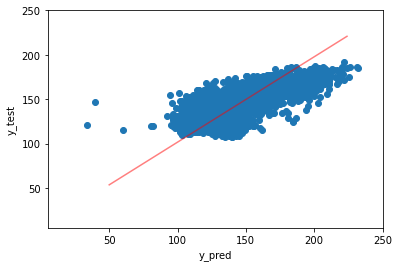

In [30]:
y = regression_input[:,0]
X = regression_input[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
m, b = np.polyfit(x=y_pred, y=y_test, deg=1)
plt.scatter(x=y_test, y=y_pred)
x_plot = [each for each in range(50, 225)]
y_plot = [each*m + b for each in x_plot]
plt.plot(x_plot, y_plot, color='red', alpha=0.5)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.ylim(5, 250)
plt.xlim(5, 250)
plt.show()

In [31]:
r2_score(y_test, y_pred)

0.48176857173290655

In [32]:
kernel = DotProduct()
#kernal = WhiteKernel(noise_level=1.5) + DotProduct(sigma_0=1.25)
#kernel = ExpSineSquared(length_scale=1, periodicity=1)
gpr = GaussianProcessRegressor(kernel=kernel, random_state=42, alpha=1e-8)
gpr.fit(X_train, y_train)
y_pred = gpr.predict(X_test)

In [33]:
 m, b = np.polyfit(x=y_pred, y=y_test, deg=1)

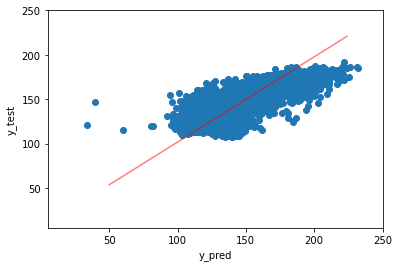

In [34]:
plt.scatter(y_test, y_pred)
x_plot = [each for each in range(50, 225)]
y_plot = [each*m + b for each in x_plot]
plt.plot(x_plot, y_plot, color='red', alpha=0.5)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.ylim(5, 250)
plt.xlim(5, 250)
plt.show()

In [35]:
r2_score(y_test, y_pred)

0.48185665840720215